In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# load the data
df = pd.read_csv('ml.csv')
df.head()

,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,GDP_Per_Capita,Trade_Rate,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Viet Nam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,2.010516e+10,-5.0,2.0,38972230.0,512.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.435263e+10,-13.0,2.0,40099462.0,356.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.454522e+10,-6.0,2.0,41128771.0,353.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.319898e+10,-2.0,2.0,42239854.0,2233.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.185274e+10,2.0,2.0,2927519.0,4114.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
# define the target variable
y = df['GDP_Per_Capita']

# define the features
X = df.drop(['GDP_Per_Capita'], axis=1)


In [121]:
X.head()

,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,Trade_Rate,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Viet Nam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,2.010516e+10,-5.0,2.0,38972230.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.435263e+10,-13.0,2.0,40099462.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.454522e+10,-6.0,2.0,41128771.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.319898e+10,-2.0,2.0,42239854.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.185274e+10,2.0,2.0,2927519.0,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
y.head()

0     512.0
1     356.0
2     353.0
3    2233.0
4    4114.0
Name: GDP_Per_Capita, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

# # Scale the features
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [124]:
# display the results of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2595, 221), (649, 221), (2595,), (649,))

In [125]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score

## Linear Regression

mean of y_test:  19004.09
rmse:  9679.05
r_square:  0.88
Test Score of Xtrain and ytrain: 0.97
Test Score of Xtest and ytest: 0.88


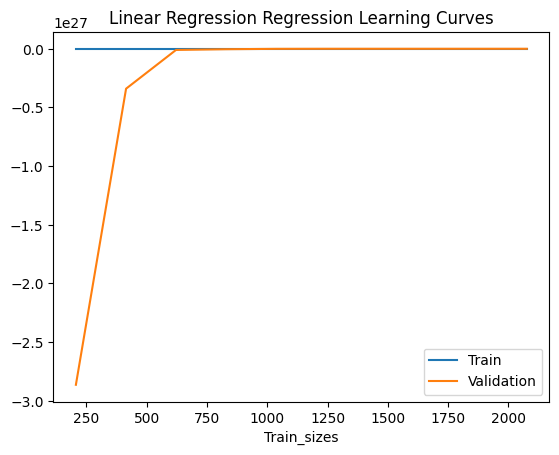

In [126]:
# Build the model
linear_reg = LinearRegression()

# Train the model 
linear_reg.fit(X_train, y_train)

## make precdictions
linear_pred = linear_reg.predict(X_test)

# evaluate the model
mean_y_true = round(y_test.mean(), 2)
linear_rmse = round(root_mean_squared_error(y_test, linear_pred), 2)
linear_r2 = round(r2_score(y_test, linear_pred), 2)

# output results
print('mean of y_test: ', mean_y_true)
print('rmse: ', linear_rmse)
print('r_square: ', linear_r2)

# test score of the model
print('Test Score of Xtrain and ytrain:',round(linear_reg.score(X_train, y_train), 2))
print('Test Score of Xtest and ytest:', round(linear_reg.score(X_test, y_test), 2))

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.xlabel('Train_sizes')
plt.title('Linear Regression Regression Learning Curves')
plt.legend()
plt.show()

## Lasso Regression 

root_mean_squared_error: 9636.05315418212
root square: 0.8777845870638982
0.9663509353364648
0.8777845870638982


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.687e+08, tolerance: 1.920e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.255e+07, tolerance: 1.511e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

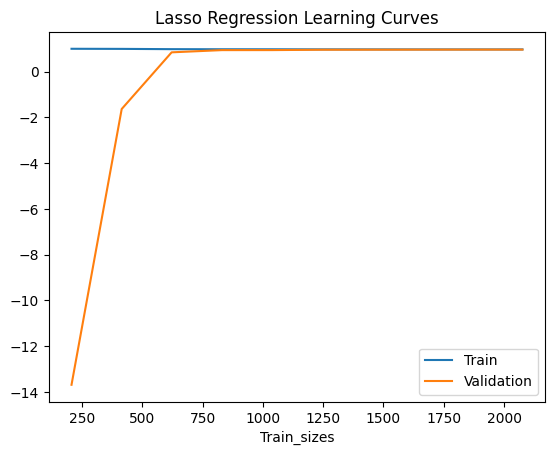

In [132]:
# Build a Lasso regression model
lasso_reg = Lasso(max_iter=10000, alpha=0.1 )

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_reg.predict(X_test)

# Evaluate the model
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# # output result
print(f'root_mean_squared_error: {lasso_rmse}')
print(f'root square: {lasso_r2}')
print(lasso_reg.score(X_train, y_train))
print(lasso_reg.score(X_test, y_test))

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(lasso_reg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.xlabel('Train_sizes')
plt.title('Lasso Regression Learning Curves')
plt.legend()
plt.show()

## ElasticNet Model

0.864297528891759
0.7964264504040847
root_mean_squared_error: 12436.462706165321
root square: 0.7964264504040847


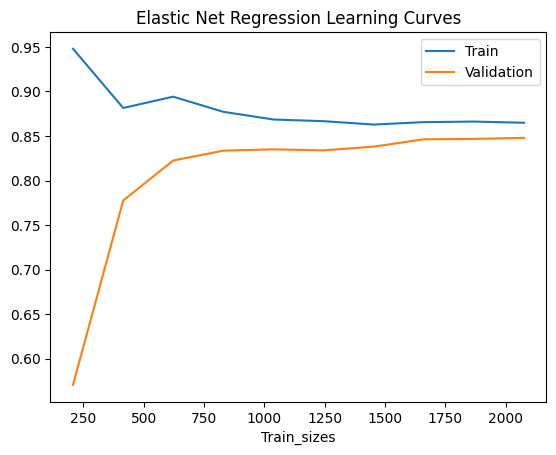

In [128]:
# Build a Elastic Net regression model
elastic_net_reg = ElasticNet(max_iter=10000, alpha=1.0)

3 # Train the model
elastic_net_reg.fit(X_train, y_train)

print(elastic_net_reg.score(X_train, y_train))
print(elastic_net_reg.score(X_test, y_test))

# # make predictions
elastic_net_pred = elastic_net_reg.predict(X_test)

# Evaluate the model
elastic_net_rmse = root_mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# output result
print(f'root_mean_squared_error: {elastic_net_rmse}')
print(f'root square: {elastic_net_r2}')

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(elastic_net_reg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.xlabel('Train_sizes')
plt.title('Elastic Net Regression Learning Curves')
plt.legend()
plt.show()

# Ridge Regression Model

root_mean_squared_error: 9371.82
root square: 0.88
0.9663306291018638
0.8843953326133692


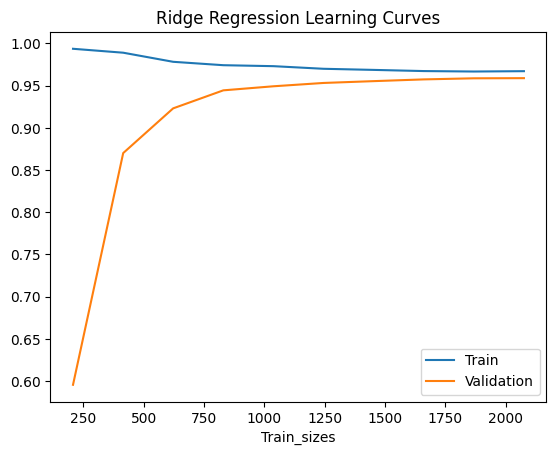

In [129]:
# Train the model 
ridge_reg = Ridge(alpha=1.0)

# Train the model
ridge_reg.fit(X_train, y_train)

# make predictions
ridge_reg_pre = ridge_reg.predict(X_test)

# Evaluate the model
ridge_rmse = round(root_mean_squared_error(y_test, ridge_reg_pre), 2)
ridge_r2 = round(r2_score(y_test, ridge_reg_pre), 2)

# output result
print(f'root_mean_squared_error: {ridge_rmse}')
print(f'root square: {ridge_r2}')

# test score of xtrain and ytrain and xtest and ytest
print(ridge_reg.score(X_train, y_train))
print(ridge_reg.score(X_test, y_test))

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(ridge_reg, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
plt.xlabel('Train_sizes')
plt.title('Ridge Regression Learning Curves')
plt.legend()
plt.show()

## Compare Models

In [130]:
# Create a DataFrame with the evaluation metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression', 'Ridge Regression'],
    'Mean_y_true ': [mean_y_true,mean_y_true,mean_y_true,mean_y_true],
    'RMSE': [linear_rmse, lasso_rmse, elastic_net_rmse, ridge_rmse],
    'R2': [linear_r2, lasso_r2, elastic_net_r2, ridge_r2]
})

results

,Model,Mean_y_true,RMSE,R2
0,Linear Regression,19004.09,9679.050000,0.880000
1,Lasso Regression,19004.09,9456.642495,0.882293
2,ElasticNet Regression,19004.09,12436.462706,0.796426
3,Ridge Regression,19004.09,9371.820000,0.880000
